<a href="https://colab.research.google.com/github/InsupCode/ML_Interpretability/blob/main/NN_for_Covid_Numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/df_cleaned_no2_mv_hosp.csv")

In [3]:
df.columns

Index(['SEX', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

In [4]:
df.dtypes

,0
SEX,int64
PNEUMONIA,int64
AGE,int64
DIABETES,int64
COPD,int64
ASTHMA,int64
INMSUPR,int64
HIPERTENSION,int64
OTHER_DISEASE,int64
CARDIOVASCULAR,int64


In [5]:
df.head()

,SEX,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,65,2,2,2,2,1,2,2,2,2,2,1
1,2,1,72,2,2,2,2,1,2,2,1,1,2,0
2,2,2,55,1,2,2,2,2,2,2,2,2,2,1
3,1,2,53,2,2,2,2,2,2,2,2,2,2,0
4,2,2,68,1,2,2,2,1,2,2,2,2,2,1


### Data prep for NN

In [6]:
# List of categorical columns
categorical_cols = ['SEX', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO']

#numerical columns
numerical_cols  = ['AGE']

In [7]:
#Separating features and labels
X = df.drop(columns=['CLASIFFICATION_FINAL'])
y = df['CLASIFFICATION_FINAL']

In [8]:
#Scaling numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [9]:
#Labels
y = y.values

In [10]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using a simple Neural Network

In [ ]:
import tensorflow as tf
print("Is GPU available: ", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Is GPU available:  True


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17192452688073521619
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8284341825387685002
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

with tf.device('/GPU:0'):  # Use the first GPU (GPU:0)
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.6535 - loss: 0.6378 - val_accuracy: 0.6560 - val_loss: 0.6364
Epoch 2/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.6555 - loss: 0.6354 - val_accuracy: 0.6558 - val_loss: 0.6354
Epoch 3/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.6565 - loss: 0.6345 - val_accuracy: 0.6558 - val_loss: 0.6356
Epoch 4/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.6568 - loss: 0.6346 - val_accuracy: 0.6565 - val_loss: 0.6347
Epoch 5/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.6557 - loss: 0.6351 - val_accuracy: 0.6555 - val_loss: 0.6350
Epoch 6/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.6565 - loss: 0.6346 - val_accuracy: 0.6561 - val_loss: 0.6346
Epoch 7/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.6576 - loss: 0.6336 - val_accuracy: 0.6560 - val_loss: 0.6343
Epoch 8/100
25629/25629 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - ac

In [ ]:
# Access the history of training
history = model.history

# Training and validation loss/accuracy for the epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print training and validation accuracy/loss
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Loss: [0.636256754398346, 0.6350662708282471, 0.6348413228988647, 0.6346525549888611, 0.6345714926719666, 0.6344522833824158, 0.63447105884552, 0.6344194412231445, 0.6343749761581421, 0.6343467235565186, 0.6343249678611755, 0.6343146562576294, 0.6342818140983582, 0.6342637538909912, 0.6342445015907288, 0.6342160701751709, 0.6341822147369385]
Validation Loss: [0.6363707780838013, 0.6353884339332581, 0.6355589032173157, 0.6347249150276184, 0.6350461840629578, 0.6346270442008972, 0.6343198418617249, 0.634416401386261, 0.6344439387321472, 0.6343547105789185, 0.6344971060752869, 0.6341062784194946, 0.6341226100921631, 0.6341908574104309, 0.634303629398346, 0.6357682347297668, 0.63478022813797]
Training Accuracy: [0.6552045345306396, 0.6560007333755493, 0.6563007235527039, 0.656337320804596, 0.6563494801521301, 0.6563738584518433, 0.6564226746559143, 0.6564616560935974, 0.6565006971359253, 0.6564701795578003, 0.6564799547195435, 0.6564933657646179, 0.6564714312553406, 0.656620204448

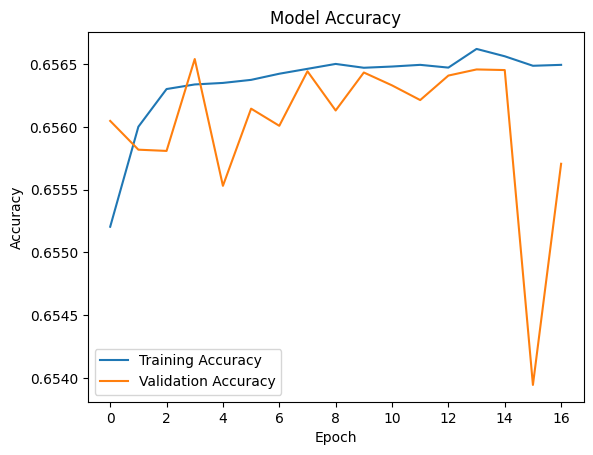

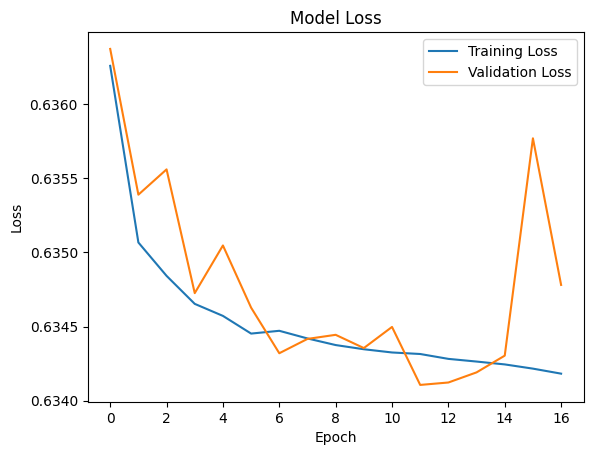

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

6408/6408 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6558 - loss: 0.6342
Test Loss: 0.6341062784194946
Test Accuracy: 0.6562129855155945


In [ ]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred = model.predict(X_test)
#for binary classification
y_pred_classes = (y_pred > 0.5).astype(int)
# Generate classification report
print(classification_report(y_test, y_pred_classes))

6408/6408 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
              precision    recall  f1-score   support

           0       0.66      0.93      0.77    127162
           1       0.65      0.21      0.31     77869

    accuracy                           0.66    205031
   macro avg       0.65      0.57      0.54    205031
weighted avg       0.65      0.66      0.60    205031



In [ ]:
#To save model:
# save the model as a pickle file
import pickle
model_pkl_file = "SimpleNN_Covid_numeric_preprocessed.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

## Trying resampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
history = model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.5884 - loss: 0.6628 - val_accuracy: 0.6293 - val_loss: 0.6627
Epoch 2/10
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.5889 - loss: 0.6625 - val_accuracy: 0.6067 - val_loss: 0.6669
Epoch 3/10
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.5892 - loss: 0.6623 - val_accuracy: 0.6326 - val_loss: 0.6598
Epoch 4/10
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.5895 - loss: 0.6622 - val_accuracy: 0.5969 - val_loss: 0.6707
Epoch 5/10
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.5887 - loss: 0.6623 - val_accuracy: 0.6250 - val_loss: 0.6571


In [ ]:
#To save model:
# save the model as a pickle file
import pickle
model_pkl_file = "SimpleNN_smote_Covid_numeric_preprocessed.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred = model.predict(X_test)
#for binary classification
y_pred_classes = (y_pred > 0.5).astype(int)
# Generate classification report
print(classification_report(y_test, y_pred_classes))

6408/6408 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
              precision    recall  f1-score   support

           0       0.68      0.76      0.72    127162
           1       0.51      0.42      0.46     77869

    accuracy                           0.63    205031
   macro avg       0.60      0.59      0.59    205031
weighted avg       0.62      0.63      0.62    205031



## Using a deeper model

In [13]:
import tensorflow as tf
print("Is GPU available: ", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Is GPU available:  True


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

with tf.device('/GPU:0'):  # Use the first GPU (GPU:0)
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_resampled.shape[1]),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.5847 - loss: 0.6660 - val_accuracy: 0.6086 - val_loss: 0.6641
Epoch 2/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.5881 - loss: 0.6631 - val_accuracy: 0.6232 - val_loss: 0.6620
Epoch 3/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.5874 - loss: 0.6631 - val_accuracy: 0.6091 - val_loss: 0.6637
Epoch 4/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.5879 - loss: 0.6629 - val_accuracy: 0.6186 - val_loss: 0.6678
Epoch 5/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.5882 - loss: 0.6628 - val_accuracy: 0.6303 - val_loss: 0.6566
Epoch 6/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.5886 - loss: 0.6629 - val_accuracy: 0.6304 - val_loss: 0.6562
Epoch 7/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.5896 - loss: 0.6627 - val_accuracy: 0.6074 - val_loss: 0.6697
Epoch 8/20
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 

In [18]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred = model.predict(X_test)
#for binary classification
y_pred_classes = (y_pred > 0.5).astype(int)
# Generate classification report
print(classification_report(y_test, y_pred_classes))

6408/6408 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
              precision    recall  f1-score   support

           0       0.68      0.76      0.72    127162
           1       0.52      0.42      0.46     77869

    accuracy                           0.63    205031
   macro avg       0.60      0.59      0.59    205031
weighted avg       0.62      0.63      0.62    205031



In [19]:
#To save model:
# save the model as a pickle file
import pickle
model_pkl_file = "deep1_smote_Covid_numeric_preprocessed.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

## Using a deeper model with more neurons

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

# Define the input layer
input_layer = Input(shape=(X_resampled.shape[1],))

# Define the first hidden layer
x = Dense(128, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Define the second hidden layer
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Define the third hidden layer
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.5780 - loss: 0.6757 - val_accuracy: 0.6086 - val_loss: 0.6611
Epoch 2/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.5866 - loss: 0.6656 - val_accuracy: 0.6214 - val_loss: 0.6594
Epoch 3/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.5867 - loss: 0.6653 - val_accuracy: 0.6066 - val_loss: 0.6644
Epoch 4/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.5860 - loss: 0.6655 - val_accuracy: 0.6168 - val_loss: 0.6598
Epoch 5/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.5857 - loss: 0.6655 - val_accuracy: 0.5951 - val_loss: 0.6671
Epoch 6/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.5862 - loss: 0.6650 - val_accuracy: 0.6192 - val_loss: 0.6665
Epoch 7/50
31820/31820 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - accuracy: 0.5860 - loss: 0.6653 - val_accuracy: 0.6253 - val_loss: 0.6612


In [33]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred = model.predict(X_test)
#for binary classification
y_pred_classes = (y_pred > 0.5).astype(int)
# Generate classification report
print(classification_report(y_test, y_pred_classes))

6408/6408 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.72      0.70    127162
           1       0.50      0.46      0.48     77869

    accuracy                           0.62    205031
   macro avg       0.59      0.59      0.59    205031
weighted avg       0.62      0.62      0.62    205031



In [34]:
config = model.get_config()
print(config)

{'name': 'functional_3', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 13), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_4'}, 'registered_name': None, 'name': 'input_layer_4', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_13', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 13)}, 'name': 'dense_13

In [36]:
#To save model:
# save the model as a pickle file
import pickle
model_pkl_file = "deep2_smote_Covid_numeric_preprocessed.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)